In [1]:
from sklearn.neighbors import LocalOutlierFactor  # For outlier detection
from sklearn.datasets import make_blobs  # To generate synthetic data
from numpy import quantile, where, random  # For quantile calculation, indexing, and random number generation

In [2]:
import matplotlib.pyplot as plt  # For creating visualizations
import numpy as np  # For numerical operations

Preparing the dataset

In [3]:
# Set the seed for reproducibility
np.random.seed(1)

# Generate a larger dataset
x, _ = make_blobs(n_samples=1000, centers=1, cluster_std=0.3, center_box=(10, 10))

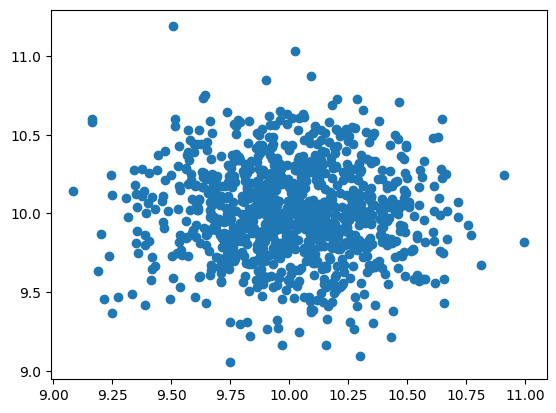

In [4]:
plt.scatter(x[:,0], x[:,1])
plt.show()

Defining the model and prediction 

In [5]:
# Create a Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)

In [6]:
# Fit the Local Outlier Factor (LOF) model to the data and predict outliers
y_pred = lof.fit_predict(x)

In [7]:
# Identify the indices of the outliers in the dataset
lofs_index = npwhere(y_pred == -1)

# Extract the data points that are classified as outliers
values = x[lofs_index]


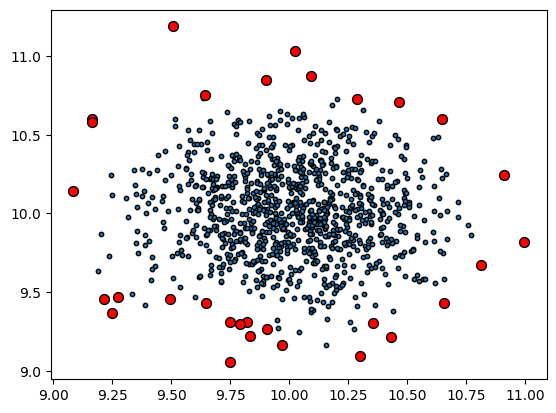

In [8]:
# Plot all data points
plt.scatter(x[:,0], x[:,1], label='Data Points', edgecolor='k', s=10)

# Plot only the outlier data points
plt.scatter(values[:,0], values[:,1], color='r', label='Outliers', edgecolor='k', s=50)

# Display the plot
plt.show()


Anomaly detection with scores

In [9]:
# Create a Local Outlier Factor (LOF) model with specified parameters
model = LocalOutlierFactor(n_neighbors=20)


In [10]:
# Fit the Local Outlier Factor (LOF) model to the data and predict outliers
model.fit_predict(x)

# Access the negative outlier factor scores from the fitted model
lof = model.negative_outlier_factor_


In [11]:
# Compute the threshold for outlier detection based on the 3rd percentile of the negative outlier factor scores
thresh = quantile(lof, 0.03)

# Print the calculated threshold value
print(thresh)


-1.4440887584552262


In [12]:
# Identify the indices of the data points whose negative outlier factor scores are below or equal to the threshold
index = where(lof <= thresh)

# Extract the data points that are classified as outliers based on the calculated threshold
values = x[index]


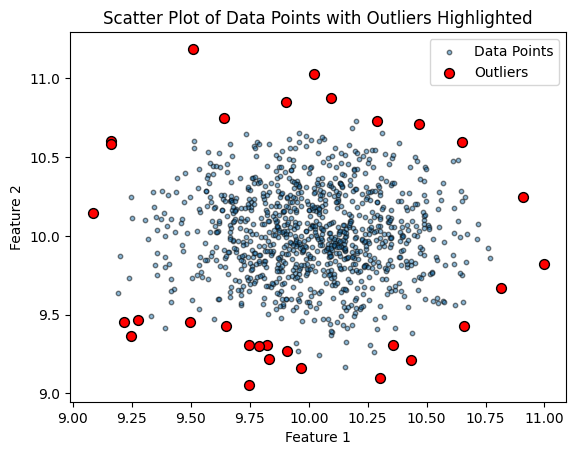

In [13]:
# Plot all data points in the dataset
plt.scatter(x[:,0], x[:,1], label='Data Points', edgecolor='k', s=10, alpha=0.5)

# Plot the outlier data points in red to highlight them
plt.scatter(values[:,0], values[:,1], color='r', label='Outliers', edgecolor='k', s=50)

# Add a title to the plot
plt.title('Scatter Plot of Data Points with Outliers Highlighted')

# Label the x and y axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Add a legend to the plot to differentiate between data points and outliers
plt.legend(loc='best')

# Display the plot
plt.show()
